# Библиотеки

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

# Загрузка данных

In [159]:
train = pd.read_csv('../data/raw/train.csv', low_memory=False)

In [160]:
train

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.86622816574095,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.651610435322,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.8090832742814,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.1649785257098,Standard


# Data overview

In [161]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

### Относительно небольшое количество пропусков
### Большинство пропусков будут заполняться нулями, или одним из мер среднего по признаку

In [162]:
train.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [163]:
train.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

### В нашем наборе данных преобладают текстовые данные
### Основной задачей будет преобразовать эти данные таким образом, чтобы количество колонок в датасете не стало слишком большим

# Работа с пропусками

### Monthly_Inhand_Salary - месячный заработок клиента банка
### Как известно, зарпалата распределена так, что большинство людей получают маленькое количество денег, однако, если брать среденее арифметическое в качестве меры, то высокие зарплаты - выбросы - сильно могут повлиять на значение этого среднего
### Проверим мою теорию и посмотрим на распределение зарплат 

In [164]:
train['Occupation'].value_counts()

Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64

### Рассмотрим график месячных зарплат в среднем за каждый конкретный месяц

<Axes: xlabel='Monthly_Inhand_Salary', ylabel='Month'>

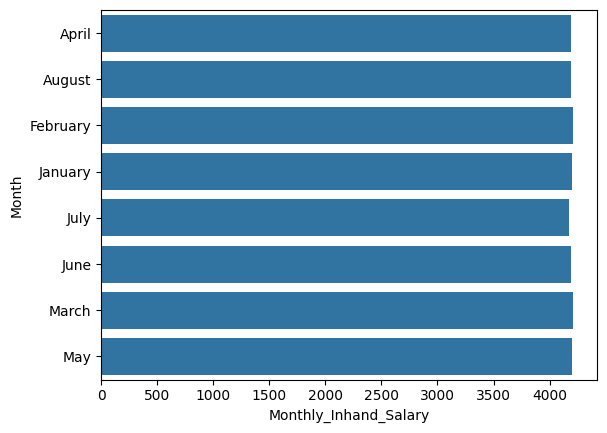

In [165]:
sns.barplot(y=train.groupby('Month')['Monthly_Inhand_Salary'].mean().index, x=train.groupby('Month')['Monthly_Inhand_Salary'].mean())

### Заметно, что распределение является равномерным, следовательно зарпалата никак не зависит от текущего месяца в году

<Axes: xlabel='Monthly_Inhand_Salary', ylabel='Count'>

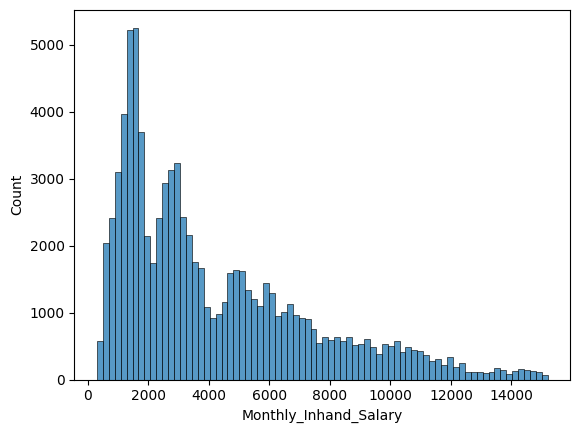

In [166]:
sns.histplot(train['Monthly_Inhand_Salary'])

### Как и ожидалось, распределение похоже на логнормальное, следовательно среднее арифметическое использовать нельзя.
### Сравним различные меры среднего между собой

In [167]:
print('Среднее арифметическое зарплат:', np.mean(train['Monthly_Inhand_Salary'].dropna()).astype(int))
print('Медиана зарплат:', np.median(train['Monthly_Inhand_Salary'].dropna()).astype(int))
print('Мода зарплат:', st.mode(train['Monthly_Inhand_Salary'].dropna().astype(int))[0])

Среднее арифметическое зарплат: 4194
Медиана зарплат: 3093
Мода зарплат: 1480


### Можем заметить, что все значения различаются достаточно сильно. 
### Возможно это связано с различной вилкой зарпалат у разных профессий. Посмотрим медианную и среднюю зарпалту у каждой профессии

<Axes: xlabel='Monthly_Inhand_Salary', ylabel='Occupation'>

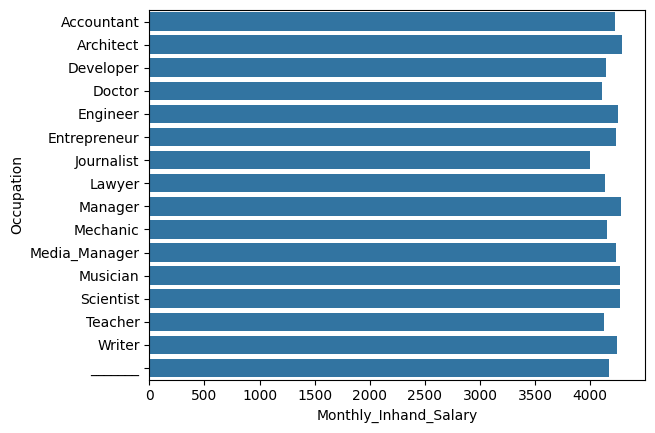

In [168]:
sns.barplot(y=train.groupby('Occupation')['Monthly_Inhand_Salary'].mean().index, x=train.groupby('Occupation')['Monthly_Inhand_Salary'].mean())

<Axes: xlabel='Monthly_Inhand_Salary', ylabel='Occupation'>

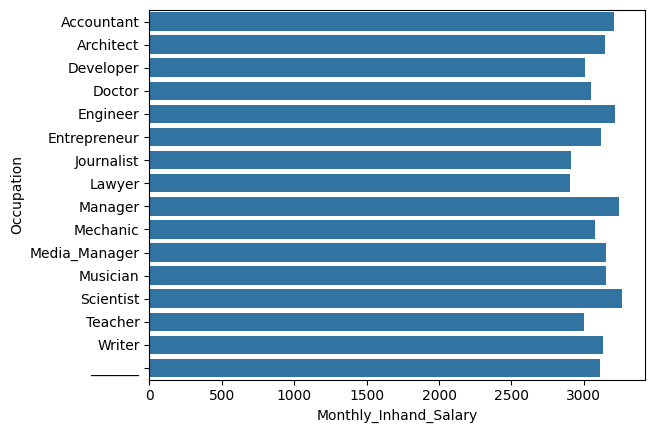

In [169]:
sns.barplot(y=train.groupby('Occupation')['Monthly_Inhand_Salary'].median().index, x=train.groupby('Occupation')['Monthly_Inhand_Salary'].median())

### Медиана и среднее у разных профессий не различают, следовательно можно использовать медиану в качестве значения, которое будет стоять на месте пропусков в колонке с зарплатой

### Логарифмируем месячный доход и посмотрим, похоже ли распределение на нормальное

<Axes: xlabel='Monthly_Inhand_Salary', ylabel='Count'>

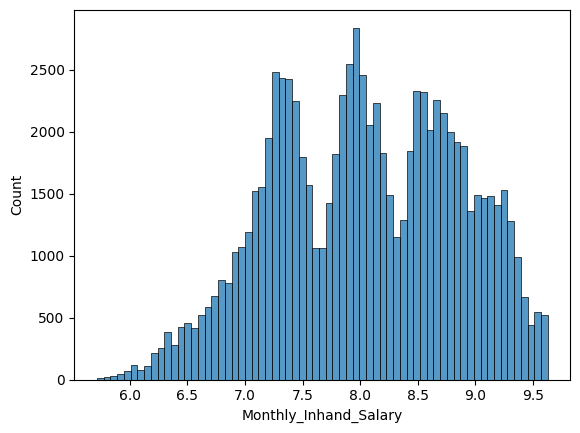

In [170]:
sns.histplot(np.log(train['Monthly_Inhand_Salary']))

### Мы получили распределение с целыми тремя максимума, что наводит на мысль о наличие различных групп клиентов в данных
### Данную гепотизу проверим в конце ноутбука

### Заполним пропуски медианным значением и приведет колонку к целочисленному типу данных

In [171]:
train['Monthly_Inhand_Salary'] = train['Monthly_Inhand_Salary'].fillna(np.median(train['Monthly_Inhand_Salary'].dropna())).astype(int)

### Type_of_Loan - цель займа

In [172]:
train['Type_of_Loan'].value_counts()

Type_of_Loan
Not Specified                                                                                                                         1408
Credit-Builder Loan                                                                                                                   1280
Personal Loan                                                                                                                         1272
Debt Consolidation Loan                                                                                                               1264
Student Loan                                                                                                                          1240
                                                                                                                                      ... 
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                 8
Payday Loan, M

### Самой популярной целью является 'Без определенной цели', что, как по мне, является идеальным значениям для заполнения пропусков

In [173]:
train['Type_of_Loan'] = train['Type_of_Loan'].fillna(train['Type_of_Loan'].value_counts().index[0])

### Num_of_Delayed_Payment - Количество просроченных выплат 
### Этот признак потенциально может испортить кредитный рейтинг клиента, так что заполнять пропуски какими-либо значениями помимо нуля, если мы не знаем количество просроченных выплат, не стоит

In [174]:
train['Num_of_Delayed_Payment'] = train['Num_of_Delayed_Payment'].fillna(0)

### Num_Credit_Inquiries - Количество запросов по кредитным картам 
### Credit_History_Age - Количество лет с момента первого кредита
### Amount_invested_monthly - Представляет собой ежемесячную сумму, инвестированную клиентом
### Monthly_Balance - Cредняя месячная сумма на балансе клиента
### Так же заполняем пропуски нулями, так как мы ничего не знаем о этих признаках клиента 

In [175]:
train['Num_Credit_Inquiries'] = train['Num_Credit_Inquiries'].fillna(0)
train['Credit_History_Age'] = train['Credit_History_Age'].fillna(0)
train['Amount_invested_monthly'] = train['Amount_invested_monthly'].fillna(0)
train['Monthly_Balance'] = train['Monthly_Balance'].fillna(0)

### Name - Имя клиента
### Можно заметить, что у нас существует целых 3 колонки, по которым можно идентефицировать клиента - Customer_ID, Name и SSN. Я предлагаю удалить признак, в котором записано имя клиента, так как мы и без него сможем определить какому пользователю принадлежит запрос. Таким образом мы уменьшим размер матрицы признаком и не будет впослдествие тратить мощности на то, что бы заполнять пропуски в этой колонке

In [176]:
train = train.drop('Name', axis=1)

# Преобразование признаков

### Как я и писал раньше, мы можем определить конкретного юзера по разным признаком. Предлагаю оставить исключительно признак SSN

In [177]:
train = train.drop(['ID', 'Customer_ID'], axis=1)

### Так же удалим колонку Type_of_Loan, так как ее неудобно обрабатывать

In [178]:
train = train.drop('Type_of_Loan', axis=1)

### Приведем тип данных оставшихся численных признаков к int или float

In [179]:
train['Amount_invested_monthly'] = pd.to_numeric(train['Amount_invested_monthly'], errors='coerce')

<Axes: xlabel='Amount_invested_monthly', ylabel='Count'>

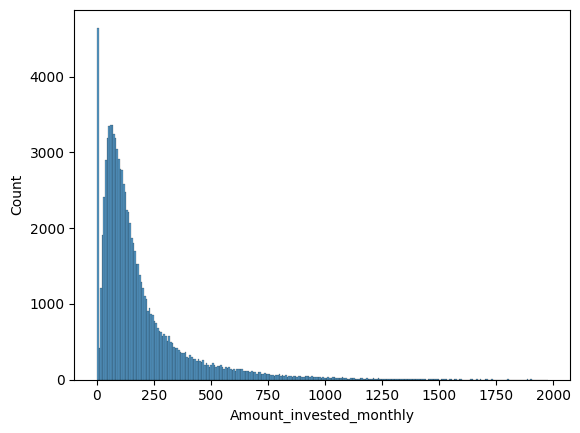

In [180]:
sns.histplot(train['Amount_invested_monthly'])

### Заметим, что большинство людей не инвестируют ни единой копейки, так что мы заполним пропуски именно этим значение

In [181]:
train['Amount_invested_monthly'] = train['Amount_invested_monthly'].fillna(st.mode(train['Amount_invested_monthly'])[0])

### При заполнение пропусков в колонке со средним балансом каждый месяц мы, фактически, заполняем не пустые значения, а некорректные, так что можем использовать в качестве меры среднего медиану

In [182]:
train['Monthly_Balance'] = pd.to_numeric(train['Monthly_Balance'], errors='coerce')
train['Monthly_Balance'] = train['Monthly_Balance'].fillna(train['Monthly_Balance'].median())

### В остальных примерах такая же ситуация. Мы заполняем пропуски, на месте которых изначально стояли некорректные значения, а не пустые

In [183]:
train['Annual_Income'] = pd.to_numeric(train['Annual_Income'], errors='coerce')
train['Annual_Income'] = train['Annual_Income'].fillna(train['Annual_Income'].median())

In [184]:
train['Credit_History_Age'] = train['Credit_History_Age'].map(lambda x: int(str(x)[0:2]))

In [185]:
train['Num_of_Loan'] = pd.to_numeric(train['Num_of_Loan'], errors='coerce')
train['Num_of_Loan'] = train['Num_of_Loan'].fillna(train['Num_of_Loan'].median())

In [186]:
train["Age"] = pd.to_numeric(train["Age"], errors="coerce")
train['Age'] = train['Age'].fillna(train['Age'].median())

In [187]:
train['Outstanding_Debt'] = pd.to_numeric(train["Outstanding_Debt"], errors="coerce")
train['Outstanding_Debt'] = train['Outstanding_Debt'].fillna(train['Outstanding_Debt'].median())

### В колонках с просроченными платежами же стоит заполнить пропуски, образовавшиеся после приведения к вещественному, нулями

In [188]:
train["Num_of_Delayed_Payment"] = pd.to_numeric(train["Num_of_Delayed_Payment"], errors="coerce")
train['Num_of_Delayed_Payment'] = train['Num_of_Delayed_Payment'].fillna(0)

### Процентное изменение лимитов по кредитной карте, в свою очередь, можно заполнить медианным значением, отражающим среднее поведение большинства людей

In [189]:
train["Changed_Credit_Limit"] = pd.to_numeric(train["Changed_Credit_Limit"], errors="coerce")
train['Changed_Credit_Limit'] = train['Changed_Credit_Limit'].fillna(train['Changed_Credit_Limit'].median())

# Преобразование категориальных колонок

In [190]:
train['Month'].value_counts()

Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64

In [191]:
map_table = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8
}

train['Month'] = train['Month'].replace(map_table)

In [192]:
train['Payment_Behaviour'] = train['Payment_Behaviour'].map(lambda x: 'unknown' if x == '!@9#%8' else x)

### Количество уникальных значений признака, показывающего работу, слишком большое что бы применять OHE, а MeanTargetEncoding нельзя использовать во время инференса, так что я использую похожу на преобразование месяцев схему

In [193]:
train['Occupation'] = train['Occupation'].map(lambda x: 'unknown' if x == '_______' else x)

In [194]:
occupation_map_table = {k: v for v, k in enumerate(train['Occupation'].unique())}

In [195]:
train['Occupation'] = train['Occupation'].replace(occupation_map_table)

### А вот признак, показывающий была ли выплачена лицом только минимальная сумма, идеально подходит для OHE

In [196]:
train = pd.concat((train.drop('Payment_of_Min_Amount', axis=1), pd.get_dummies(train['Payment_of_Min_Amount'], dtype=int)), axis=1)

### Так же как и фича, отражающая платежное поведение клиента

In [197]:
train = pd.concat((train.drop('Payment_Behaviour', axis=1), pd.get_dummies(train['Payment_Behaviour'], dtype=int)), axis=1)

### Удалим колонку с неизвестным поведенческим рейтингом воизбежание мультиколлениарности 

In [198]:
train = train.drop('unknown', axis=1)

### Произведем те же операции и с средним кредитным рейтингом по предыдущим запросам

In [199]:
train['Credit_Mix'] = train['Credit_Mix'].map(lambda x: 'NoData' if x == '_' else x)

In [200]:
train = pd.concat((train.drop('Credit_Mix', axis=1), pd.get_dummies(train['Credit_Mix'], dtype=int)), axis=1)

### Удалим колонку с неизвестным кредитный миксом воизбежание мультиколлениарности 

In [201]:
train = train.drop('NoData', axis=1)

### Важно закодировать значение тагрета, чтобы мы могли работать с ним. Всего у нас будет три класса:
### 0 - Poor
### 1 - Standard
### 2 - Good

In [202]:
target_map = {
    'Poor': 0,
    'Standard': 1,
    'Good': 2
}

train['Credit_Score'] = train['Credit_Score'].replace(target_map)

# Работа с выбросами

### Я предлогаю написать функцию, которая будет удалять значения, которых не существует в реальной жизни. После удаления мы будет заполнять колонки мерами среднего

In [203]:
def clear_column(column: pd.Series, values_normal_values: list) -> pd.Series:
    new_column = np.array([])

    for value in column:
        if value in values_normal_values:
            new_column = np.append(new_column, value)
        
        else:
            new_column = np.append(new_column, pd.NA)

    return pd.Series(new_column)

### Теперь проведем такую фильтрацию в нужных колонках, а так же заполним неопределенные значения

<Axes: ylabel='Age'>

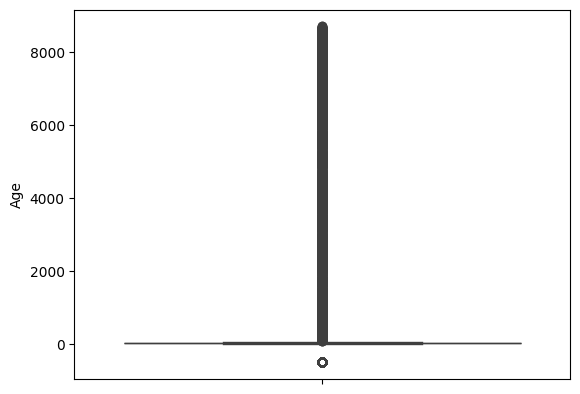

In [204]:
sns.boxplot(train['Age'])

### Можно заметить что выбросов в колонке с возрастом достаточно много. Удалим их и заменим на медианное значение

In [205]:
train['Age'] = clear_column(train['Age'], list(range(1, 100)))
train['Age'] = train['Age'].fillna(train['Age'].median())

### Проверим количество отрицательно просроченных платежей в среднем

In [206]:
train[train['Delay_from_due_date'] < 0]['Delay_from_due_date']

1       -1
49      -1
74      -2
78      -1
79      -2
        ..
99198   -2
99358   -1
99368   -4
99371   -5
99667   -2
Name: Delay_from_due_date, Length: 591, dtype: int64

### Занулим значения

In [207]:
train['Delay_from_due_date'] = clear_column(train['Delay_from_due_date'], list(range(0, max(train['Delay_from_due_date'].values))))
train['Delay_from_due_date'] = train['Delay_from_due_date'].fillna(0)

# Проверка дополнительных гипотез

### В начале ноутбука я предположил, что наши пользователи делятся на некоторые группы, так как мы имеем три максимума на графике распределения зарплат. Проверим эту гипотезу

In [208]:
salary_median = np.median(train['Monthly_Inhand_Salary'])

<Axes: xlabel='Monthly_Inhand_Salary', ylabel='Count'>

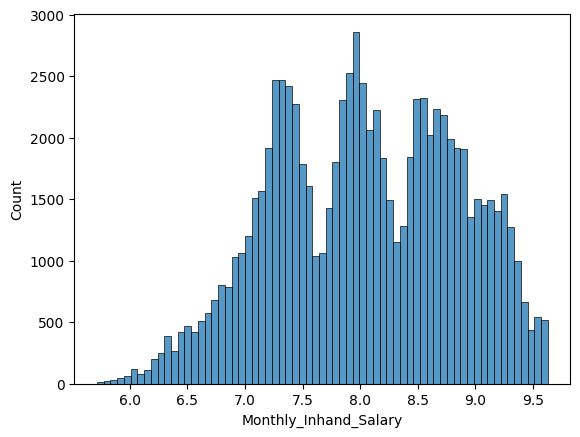

In [209]:
sns.histplot(np.log(train[train['Monthly_Inhand_Salary'] != salary_median]['Monthly_Inhand_Salary']))

### Проверим нормальность распределения

In [210]:
st.shapiro(np.log(train['Monthly_Inhand_Salary']))

/Users/vladimir/Desktop/GitHub/CreditScroingProject/scoring_venv/lib/python3.9/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.985366702079773, pvalue=0.0)

In [211]:
st.normaltest(np.log(train['Monthly_Inhand_Salary']))

NormaltestResult(statistic=1358.920280016087, pvalue=8.207493005574848e-296)

### p-value равен нулю - - > отклоняем нулевую гипотезу о том, что распределение нормальное

In [212]:
normal_salary = np.random.normal(
    loc=np.mean(np.log(train['Monthly_Inhand_Salary'])),
    scale=(np.log(train['Monthly_Inhand_Salary']).var()),
    size=len(train['Monthly_Inhand_Salary'])
    )

### Поделим пользователей на группы относительно их дохода и посмотрим на распределение различных статистик

In [213]:
first_max_group = train[train['Monthly_Inhand_Salary'] < 2000]
second_max_group = train[(train['Monthly_Inhand_Salary'] != salary_median) & (train['Monthly_Inhand_Salary'].between(2000, 4000))]
third_max_group = train[train['Monthly_Inhand_Salary'] > 4000]

(array([ 890.,  970., 1062., 1605., 1836., 1828., 1583., 1478., 1812.,
        1694., 1380., 1645., 1416., 1478., 1043., 1144., 1130., 1166.,
        1152.,  951., 1217., 1146., 1062.,  780.,  727.,  467.,  313.,
         433.,  430.,  350.]),
 array([8.29454952, 8.33904166, 8.3835338 , 8.42802595, 8.47251809,
        8.51701023, 8.56150238, 8.60599452, 8.65048667, 8.69497881,
        8.73947095, 8.7839631 , 8.82845524, 8.87294738, 8.91743953,
        8.96193167, 9.00642382, 9.05091596, 9.0954081 , 9.13990025,
        9.18439239, 9.22888454, 9.27337668, 9.31786882, 9.36236097,
        9.40685311, 9.45134525, 9.4958374 , 9.54032954, 9.58482169,
        9.62931383]),
 <BarContainer object of 30 artists>)

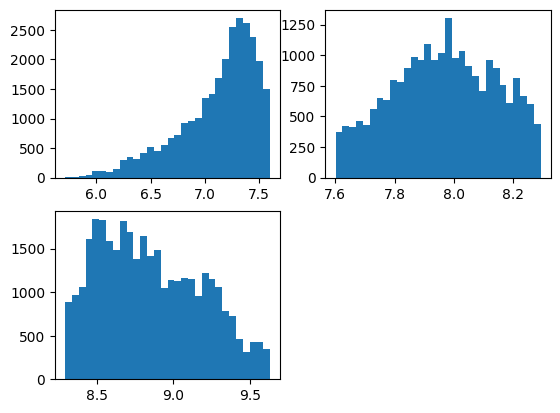

In [214]:
plot = plt.figure()

plot.add_subplot(2, 2, 1)
plt.hist(np.log(first_max_group['Monthly_Inhand_Salary']), bins=30)

plot.add_subplot(2, 2, 2)
plt.hist(np.log(second_max_group['Monthly_Inhand_Salary']), bins=30)

plot.add_subplot(2, 2, 3)
plt.hist(np.log(third_max_group['Monthly_Inhand_Salary']), bins=30)

### Логарифм зарплат, как мы и наблюдали раньше, имеет по ярковыраженному максимуму в каждой групе

In [215]:
first_max_group.columns

Index(['Month', 'Age', 'SSN', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance', 'Credit_Score', 'NM', 'No', 'Yes',
       'High_spent_Large_value_payments', 'High_spent_Medium_value_payments',
       'High_spent_Small_value_payments', 'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments', 'Low_spent_Small_value_payments',
       'Bad', 'Good', 'Standard'],
      dtype='object')

(array([2284., 3617., 3530., 3493., 6259., 4420., 3504., 2907., 2040.,
        2134.]),
 array([14. , 18.2, 22.4, 26.6, 30.8, 35. , 39.2, 43.4, 47.6, 51.8, 56. ]),
 <BarContainer object of 10 artists>)

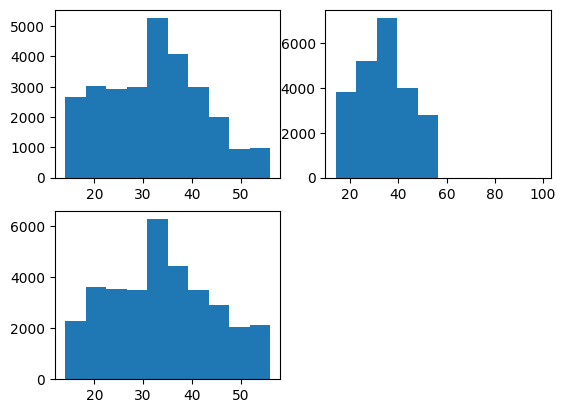

In [216]:
plot = plt.figure()

plot.add_subplot(2, 2, 1)
plt.hist(first_max_group['Age'])

plot.add_subplot(2, 2, 2)
plt.hist(second_max_group['Age'])

plot.add_subplot(2, 2, 3)
plt.hist(third_max_group['Age'])

### В каждой группе находятся пользователи примерно одинакового возраста

([<matplotlib.patches.Wedge at 0x7fe902db0d30>,
 [Text(-0.1714389082854454, 1.0865581902161958, '2'),
  Text(-0.5501750884195987, -0.9525268353608137, '1'),
  Text(0.8551403798522745, -0.6919067355837113, '0')],
 [Text(-0.09351213179206112, 0.5926681037542886, '55.0%'),
  Text(-0.3000955027743265, -0.5195600920149893, '23.4%'),
  Text(0.4664402071921497, -0.37740367395475155, '21.7%')])

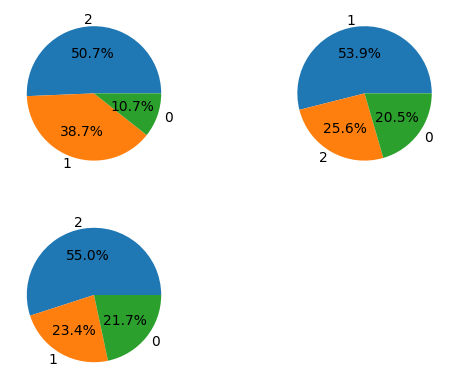

In [217]:
plot = plt.figure()

plot.add_subplot(2, 2, 1)
plt.pie(first_max_group['Credit_Score'].value_counts(), labels=first_max_group['Credit_Score'].unique(), autopct='%1.1f%%')

plot.add_subplot(2, 2, 2)
plt.pie(second_max_group['Credit_Score'].value_counts(), labels=second_max_group['Credit_Score'].unique(), autopct='%1.1f%%')

plot.add_subplot(2, 2, 3)
plt.pie(third_max_group['Credit_Score'].value_counts(), labels=third_max_group['Credit_Score'].unique(), autopct='%1.1f%%') 

### Заметим, что в каждой группе преобладает повышенный кредитный рейтинг, а так же, почему-то, в группе с зарплатой ниже 25-го перцентиля, меньше всего людей с плохим кредитным рейтингом

### Посмотрим на то, как разделение клиентов по ежемесячному доходу влияет на оставшуюся по кредиту задолженность

(array([8931., 7958., 9911., 1771., 1755., 1323.,  602.,  720.,  614.,
         603.]),
 array([2.300000e-01, 5.000140e+02, 9.997980e+02, 1.499582e+03,
        1.999366e+03, 2.499150e+03, 2.998934e+03, 3.498718e+03,
        3.998502e+03, 4.498286e+03, 4.998070e+03]),
 <BarContainer object of 10 artists>)

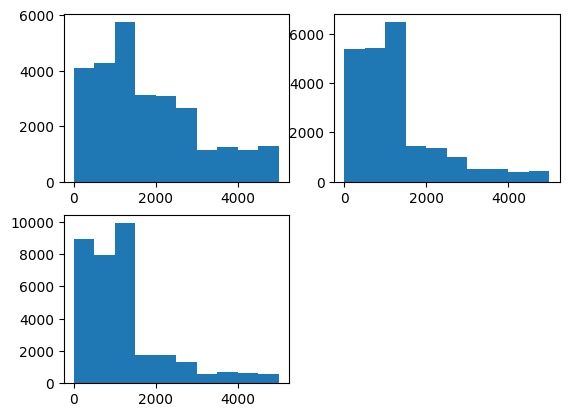

In [218]:
plot = plt.figure()

plot.add_subplot(2, 2, 1)
plt.hist(first_max_group['Outstanding_Debt'])

plot.add_subplot(2, 2, 2)
plt.hist(second_max_group['Outstanding_Debt'])

plot.add_subplot(2, 2, 3)
plt.hist(third_max_group['Outstanding_Debt'])

### Как и ожидалось, только группа клиентов с относительной низкой заработной платой выделяется повышенной задолженность

# Корреляционный отбор признаков

In [219]:
train.drop('SSN', axis=1).corr(method='spearman')

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Yes,High_spent_Large_value_payments,High_spent_Medium_value_payments,High_spent_Small_value_payments,Low_spent_Large_value_payments,Low_spent_Medium_value_payments,Low_spent_Small_value_payments,Bad,Good,Standard
Month,1.000000,0.015086,-0.000736,-0.000146,-0.001850,-0.001206,0.000223,0.000696,-0.002064,0.000537,...,0.000017,-0.005220,-0.000471,-0.004033,0.002578,-0.002305,0.004911,-0.001764,0.001368,-0.000966
Age,0.015086,1.000000,0.010962,0.071436,0.063429,-0.160054,-0.117934,-0.181121,-0.165175,-0.152310,...,-0.201921,0.020664,0.009936,-0.001563,0.002462,0.003102,-0.026406,-0.141591,0.160699,-0.027426
Occupation,-0.000736,0.010962,1.000000,0.004025,0.002845,0.002457,-0.008980,0.003437,-0.006467,-0.005025,...,-0.001001,-0.000571,0.004275,-0.007826,0.000971,0.002085,-0.000864,-0.009857,-0.007580,0.013808
Annual_Income,-0.000146,0.071436,0.004025,1.000000,0.864860,-0.244519,-0.178971,-0.258842,-0.201363,-0.222465,...,-0.233167,0.230054,0.126053,0.007230,-0.021510,0.003905,-0.283884,-0.200448,0.223561,-0.030160
Monthly_Inhand_Salary,-0.001850,0.063429,0.002845,0.864860,1.000000,-0.225633,-0.166038,-0.242101,-0.185441,-0.206710,...,-0.217951,0.221566,0.128292,0.007223,-0.023437,0.003503,-0.280131,-0.187851,0.208501,-0.027460
Num_Bank_Accounts,-0.001206,-0.160054,0.002457,-0.244519,-0.225633,1.000000,0.398657,0.553923,0.394190,0.556410,...,0.485122,-0.064273,-0.026722,-0.009211,0.000805,-0.004520,0.079734,0.481192,-0.518922,0.068553
Num_Credit_Card,0.000223,-0.117934,-0.008980,-0.178971,-0.166038,0.398657,1.000000,0.426859,0.323371,0.421880,...,0.327551,-0.047485,-0.015948,-0.000685,-0.002680,-0.007982,0.059791,0.415507,-0.298643,-0.069419
Interest_Rate,0.000696,-0.181121,0.003437,-0.258842,-0.242101,0.553923,0.426859,1.000000,0.451091,0.548391,...,0.542790,-0.072967,-0.027204,-0.001322,-0.002658,-0.001747,0.084886,0.509836,-0.537386,0.063173
Num_of_Loan,-0.002064,-0.165175,-0.006467,-0.201363,-0.185441,0.394190,0.323371,0.451091,1.000000,0.400669,...,0.394827,-0.053637,-0.026049,0.001817,-0.003760,-0.003845,0.066609,0.460341,-0.316614,-0.092124
Delay_from_due_date,0.000537,-0.152310,-0.005025,-0.222465,-0.206710,0.556410,0.421880,0.548391,0.400669,1.000000,...,0.462951,-0.062062,-0.022598,-0.003539,0.000135,-0.008849,0.076724,0.515916,-0.470946,-0.000621


### Сразу можем заметить, что такие признаки, как 'Month' и 'Occupation' никак не коорелируют с остальными признаками. Удалим их

In [220]:
train = train.drop(['Month', 'Occupation'], axis=1)

### Так же у нас есть изначально понятно что коррелирующие признаки, такие как 'Monthly_Balance', 'Annual_Income' и 'Monthly_Inhand_Salary', отражающие практически одни и те же вещи. Оставим среди них только один признак - месячный доход клиента

In [221]:
train = train.drop(['Monthly_Balance', 'Annual_Income'], axis=1)

In [222]:
train.drop('SSN', axis=1).corr(method='spearman')

,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,...,Yes,High_spent_Large_value_payments,High_spent_Medium_value_payments,High_spent_Small_value_payments,Low_spent_Large_value_payments,Low_spent_Medium_value_payments,Low_spent_Small_value_payments,Bad,Good,Standard
Age,1.000000,0.063429,-0.160054,-0.117934,-0.181121,-0.165175,-0.152310,-0.132573,-0.135998,-0.211971,...,-0.201921,0.020664,0.009936,-0.001563,0.002462,0.003102,-0.026406,-0.141591,0.160699,-0.027426
Monthly_Inhand_Salary,0.063429,1.000000,-0.225633,-0.166038,-0.242101,-0.185441,-0.206710,-0.183334,-0.132985,-0.218626,...,-0.217951,0.221566,0.128292,0.007223,-0.023437,0.003503,-0.280131,-0.187851,0.208501,-0.027460
Num_Bank_Accounts,-0.160054,-0.225633,1.000000,0.398657,0.553923,0.394190,0.556410,0.465498,0.284472,0.474147,...,0.485122,-0.064273,-0.026722,-0.009211,0.000805,-0.004520,0.079734,0.481192,-0.518922,0.068553
Num_Credit_Card,-0.117934,-0.166038,0.398657,1.000000,0.426859,0.323371,0.421880,0.313440,0.190983,0.383813,...,0.327551,-0.047485,-0.015948,-0.000685,-0.002680,-0.007982,0.059791,0.415507,-0.298643,-0.069419
Interest_Rate,-0.181121,-0.242101,0.553923,0.426859,1.000000,0.451091,0.548391,0.451557,0.323649,0.560757,...,0.542790,-0.072967,-0.027204,-0.001322,-0.002658,-0.001747,0.084886,0.509836,-0.537386,0.063173
Num_of_Loan,-0.165175,-0.185441,0.394190,0.323371,0.451091,1.000000,0.400669,0.330670,0.271903,0.460451,...,0.394827,-0.053637,-0.026049,0.001817,-0.003760,-0.003845,0.066609,0.460341,-0.316614,-0.092124
Delay_from_due_date,-0.152310,-0.206710,0.556410,0.421880,0.548391,0.400669,1.000000,0.451236,0.265509,0.483081,...,0.462951,-0.062062,-0.022598,-0.003539,0.000135,-0.008849,0.076724,0.515916,-0.470946,-0.000621
Num_of_Delayed_Payment,-0.132573,-0.183334,0.465498,0.313440,0.451557,0.330670,0.451236,1.000000,0.231278,0.384930,...,0.413404,-0.049511,-0.022701,0.000113,-0.001780,-0.001977,0.064616,0.421192,-0.449164,0.055874
Changed_Credit_Limit,-0.135998,-0.132985,0.284472,0.190983,0.323649,0.271903,0.265509,0.231278,1.000000,0.338315,...,0.443464,-0.036326,-0.010791,0.003338,0.000563,-0.008130,0.045436,0.170789,-0.356393,0.181427
Num_Credit_Inquiries,-0.211971,-0.218626,0.474147,0.383813,0.560757,0.460451,0.483081,0.384930,0.338315,1.000000,...,0.525554,-0.065637,-0.028505,-0.003013,-0.003070,-0.000457,0.080011,0.472070,-0.417928,-0.011174


### Удалим фичи 'Total_EMI_per_month' и 'Credit_Utilization_Ratio' так как они никак не коррелируют со средним кредитным рейтингом клиента за последнее время

In [223]:
train = train.drop(['Total_EMI_per_month', 'Credit_Utilization_Ratio'], axis=1)

# Сохраняем данные

In [57]:
train.to_csv('../data/processed/preprocessed_data.csv', index=False)